In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import wofz

The gaussian function is:

$$g(x) = \dfrac{A}{\sigma\sqrt{2\pi}}exp(\dfrac{-(x-\mu)^2}{2\sigma^2}),$$

where $A$ is the amplitude, $\mu$ is the mean (peak center), and $\sigma$ is the variance.

> The half-width at half-maximum (HWHM) for a gaussian distribution, $\alpha$, can be calculate with $$\alpha = \sigma\sqrt{2ln(2)}.$$

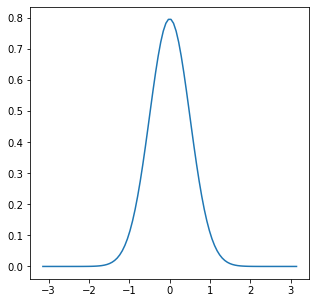

In [4]:
# functions

def gaussian(x, A, mu, sigma):
    return A/sigma/np.sqrt(2*np.pi)*np.exp(-(x-mu)**2/2/(sigma**2))


# quick test

x = np.linspace(-np.pi, np.pi, 100)

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(x, gaussian(x, 1, 0, 0.5))

The Lorentz function (a probability density function, PDF) is:

$$l(x) = \dfrac{1}{\pi\gamma} \dfrac{1}{1+(\dfrac{x-\mu}{\gamma})^2} ,$$

where $\mu$ is the mean (peak center) and $\gamma$ is the half-width at half-maximum (HWHM).

Since X-ray diffraction signal from detector is not a proper PDF, the function above need to be adjusted for peak fitting purpose, namely

$$l(x) = I \left[\dfrac{\gamma^2}{(x-\mu)^2 + \gamma^2} \right],$$

where $I$ is the height of the peak.

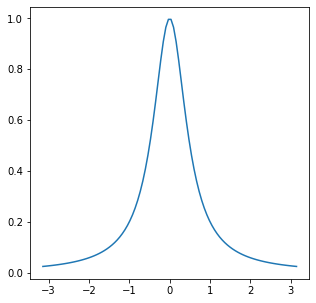

In [3]:
def lorentz(x, I, mu, gamma):
    return I*(gamma**2)/((x-mu)**2 + gamma**2)

# quick test
x = np.linspace(-np.pi, np.pi, 100)

fig, ax = plt.subplots(1,1,figsize=(5,5))
ax.plot(x, lorentz(x, 1, 0, 0.5))

The Voigt line profile is the convolution of a Gaussian profile, g(x;σ) and a Lorentzian profile, l(x;γ), 

$$v(x, A, \mu, \sigma, \gamma) = \int_{-\infty}^{+\infty} g(x, 1,\mu, \sigma) \: l(\mu-x, A, \mu, \gamma) dx.$$

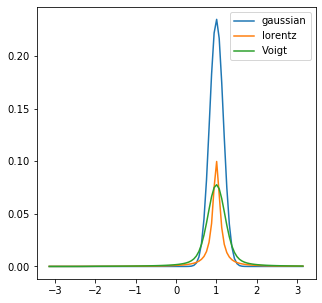

In [62]:
def voigt(x, A, mu, sigma, gamma):
    gg = gaussian(x,    1, mu, sigma)
    ll = lorentz(mu-x,  A*gamma, mu, gamma)
    return np.convolve(gg, ll, 'same')

# quick test
x = np.linspace(-np.pi, np.pi, 101)
A  = 0.1
mu = 1.0
alpha = 0.2
sigma = alpha/np.sqrt(2*np.log(2))
gamma = 0.1

fig, ax = plt.subplots(1,1,figsize=(5,5))

ax.plot(x, gaussian(x, A, mu, sigma), label='gaussian')
ax.plot(x, lorentz( x, A, mu, gamma), label='lorentz')
ax.plot(x, voigt(   x, A, mu, sigma, gamma), label='Voigt')

ax.legend()

As pointed by [this post](https://stackoverflow.com/questions/53156135/wrong-voigt-output-convolution-with-asymmetric-x-input), convolution is expensive in terms of computation time which can get annoying when used as fit model. The following sample code does not need convolution.

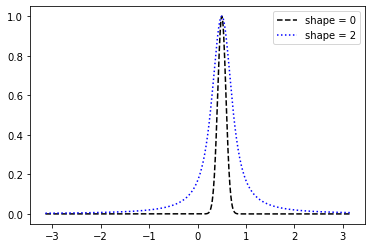

In [59]:
def voigt(x, amp, pos, fwhm, shape):
    tmp = 1/wofz(np.zeros((len(x))) +1j*np.sqrt(np.log(2.0))*shape).real
    return tmp*amp*wofz(2*np.sqrt(np.log(2.0))*(x-pos)/fwhm+1j*np.sqrt(np.log(2.0))*shape).real

x = np.linspace(-np.pi, np.pi, 1001)
y0 = voigt(x, 1, 0.5, 0.2, 0)
y1 = voigt(x, 1, 0.5, 0.2, 2)
plt.plot(x,y0,'k--',label='shape = 0')
plt.plot(x,y1,'b:', label='shape = 2')
plt.legend(loc=0)
plt.show()

Therefore, we should use the fast version above for peak fitting purpose.